### Skill score figure

Figure 3 of article

Imports

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.patheffects as path_effects
import glob

In [2]:
boot_current_bss = pd.read_csv('/glade/scratch/molina/DL_proj/model25_boot_current_bss.csv')
boot_future_bss = pd.read_csv('/glade/scratch/molina/DL_proj/model25_boot_future_bss.csv')
boot_outlier_bss = pd.read_csv('/glade/scratch/molina/DL_proj/model25_boot_outlier_bss.csv')

In [3]:
data = xr.open_dataset('/glade/scratch/molina/DL_proj/model25_evaldata.nc')

In [4]:
CSI_current = data['CSI_current'].values
CSI_future = data['CSI_future'].values
CSI_outlier = data['CSI_outlier'].values
bss_scalar_currentclimo = data['bss_scalar_currentclimo'].values
bss_scalar_futureclimo = data['bss_scalar_futureclimo'].values
bss_scalar_outlierclimo = data['bss_scalar_outlierclimo'].values
bss_scalar_current = data['bss_scalar_current'].values
bss_scalar_future = data['bss_scalar_future'].values
bss_scalar_outlier = data['bss_scalar_outlier'].values
bsscurve_current = data['bsscurve_current'].values
bsscurve_future = data['bsscurve_future'].values
bsscurve_out = data['bsscurve_out'].values
bssfreqs_current = data['bssfreqs_current'].values
bssfreqs_future = data['bssfreqs_future'].values
bssfreqs_out = data['bssfreqs_out'].values
x_boot = data['x_boot'].values
y_btmn_c1 = data['y_btmn_c1'].values
y_btmn_c2 = data['y_btmn_c2'].values
y_btmn_f1 = data['y_btmn_f1'].values
y_btmn_f2 = data['y_btmn_f2'].values
y_btmn_o1 = data['y_btmn_o1'].values
y_btmn_o2 = data['y_btmn_o2'].values
dlcurrent_far = data['dlcurrent_far'].values
dlcurrent_pod = data['dlcurrent_pod'].values
dlfuture_far = data['dlfuture_far'].values
dlfuture_pod = data['dlfuture_pod'].values
dlfutureout_far = data['dlfutureout_far'].values
dlfutureout_pod = data['dlfutureout_pod'].values

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


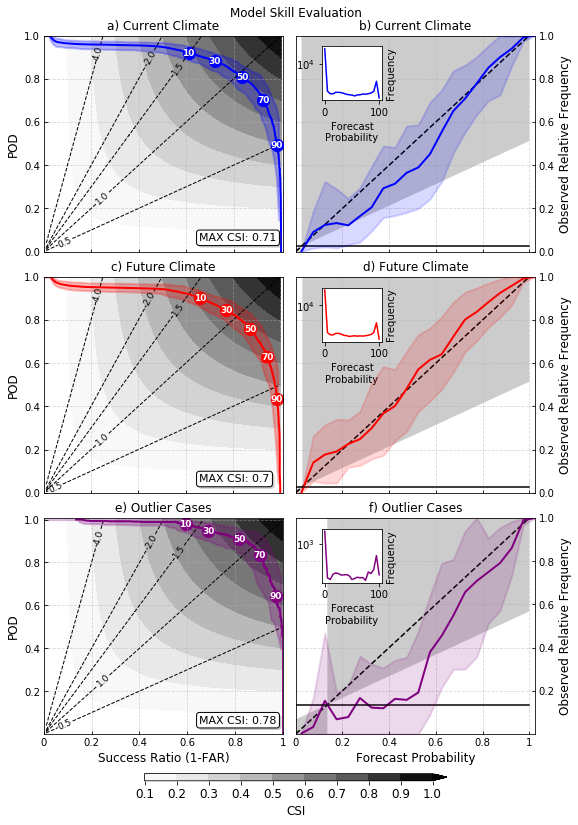

In [5]:
#-----------------------%

# plot constants
ticks = np.arange(0, 1.01, 0.01)
sr_g, pod_g = np.meshgrid(ticks, ticks)
bias = pod_g / sr_g
csi = 1.0 / (1.0 / sr_g + 1.0 / pod_g - 1.0)

#-----------------------%

fig = plt.figure(figsize=(7.,10.))
fig.suptitle('Model Skill Evaluation', fontsize=12, y=1.01)

#-----------------------%

ax1 = fig.add_axes([0.0, 0.67, 0.475, 0.3])

ax1.set_title('a) Current Climate', fontsize=12)

# set up 
csi_contour = ax1.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap="Greys")
b_contour = ax1.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed", linewidths=1.)
ax1.clabel(b_contour, inline=1, fontsize=9, inline_spacing=0, manual=False, fmt='%0.1f')

ax1.fill_between(x_boot, y_btmn_c1, y_btmn_c2,
                 color="b", linestyle='-',label='Current', lw=2.0, alpha=0.25)

ls1, = ax1.plot((1-dlcurrent_far), dlcurrent_pod, color="b", linestyle='-',label='Current', lw=2.0)

ax1.text(0.65, 0.05, u'MAX CSI: '+str(np.round(CSI_current,2)), 
         fontsize=11, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., 
                   boxstyle='round', pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

ax1.scatter(1-dlcurrent_far[1000], dlcurrent_pod[1000], s=150, c='b', zorder=100)
ax1.annotate(str(90),  xy=(1-dlcurrent_far[1000], dlcurrent_pod[1000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax1.scatter(1-dlcurrent_far[3000], dlcurrent_pod[3000], s=150, c='b')
ax1.annotate(str(70),  xy=(1-dlcurrent_far[3000], dlcurrent_pod[3000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax1.scatter(1-dlcurrent_far[5000], dlcurrent_pod[5000], s=150, c='b')
ax1.annotate(str(50),  xy=(1-dlcurrent_far[5000], dlcurrent_pod[5000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax1.scatter(1-dlcurrent_far[7000], dlcurrent_pod[7000], s=150, c='b')
ax1.annotate(str(30),  xy=(1-dlcurrent_far[7000], dlcurrent_pod[7000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax1.scatter(1-dlcurrent_far[9000], dlcurrent_pod[9000], s=150, c='b')
ax1.annotate(str(10),  xy=(1-dlcurrent_far[9000], dlcurrent_pod[9000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')

ax1.set_ylabel('POD', fontsize=12)

ax1.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax1.set_xticklabels([])

ax1.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax1.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0])

ax1.margins(x=0, y=0)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True)

#-----------------------%

ax2 = fig.add_axes([0.5, 0.67, 0.475, 0.3])

ax2.set_title('b) Current Climate', fontsize=12)

ax2.plot(ticks, ticks, "k--")

ax2.plot(np.unique(boot_current_bss["Bin_Center"]), bsscurve_current, color="b", linestyle='-',label='Current', lw=2.0)

ax2.fill_between(np.unique(boot_current_bss["Bin_Center"]), 
                 boot_current_bss.groupby('Bin_Start').min()["Positive_Relative_Freq"], 
                 boot_current_bss.groupby('Bin_Start').max()["Positive_Relative_Freq"], 
                 color="b", linestyle='-',label='Current', lw=2.0, alpha=0.15, zorder=100)

ticks=np.arange(0, 1.1, 0.1)
climo = bss_scalar_currentclimo
no_skill = 0.5 * ticks + 0.5 * climo
skill_x = [climo, climo, 1, 1, climo, climo, 0, 0, climo]
skill_y = [climo, 1, 1, no_skill[-1], climo, 0, 0, no_skill[0], climo]
f = ax2.fill(skill_x, skill_y, "0.8")
f[0].set_zorder(1)
ax2.plot(ticks, np.ones(ticks.shape) * climo, "k-")

ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax2.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0])

ax2.set_ylabel("Observed Relative Frequency", fontsize=12)
ax2.yaxis.set_label_position("right")

ax2.margins(x=0, y=0)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', direction='in', left=False, right=True, labelleft=False, labelright=True)

axins = ax2.inset_axes([0.11, 0.7, 0.25, 0.25])
axins.semilogy(np.unique(boot_current_bss["Bin_Start"]) * 100, bssfreqs_current[:-1], color="blue")
axins.set_xlabel("Forecast\nProbability")
axins.set_ylabel("Frequency")
axins.yaxis.set_label_position("right")

#-----------------------%

ax3 = fig.add_axes([0.0, 0.335, 0.475, 0.3])

ax3.set_title('c) Future Climate', fontsize=12)

# set up 
csi_contour = ax3.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap="Greys")
b_contour = ax3.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed", linewidths=1.)
ax3.clabel(b_contour, inline=1, fontsize=9, inline_spacing=0, manual=False, fmt='%0.1f')

ax3.fill_between(x_boot, y_btmn_f1, y_btmn_f2, 
                 color="r", linestyle='-', lw=2.0, alpha=0.25)

ax3.text(0.65, 0.05, u'MAX CSI: '+str(np.round(CSI_future,2)), 
         fontsize=11, alpha=1., color='k', zorder=6, transform=ax3.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., 
                   boxstyle='round', pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

ls3, = ax3.plot((1-dlfuture_far), dlfuture_pod, color="r", linestyle='-',label='Future', lw=2.0)

ax3.scatter(1-dlfuture_far[1000], dlfuture_pod[1000], s=150, c='r')
ax3.annotate(str(90),  xy=(1-dlfuture_far[1000], dlfuture_pod[1000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax3.scatter(1-dlfuture_far[3000], dlfuture_pod[3000], s=150, c='r')
ax3.annotate(str(70),  xy=(1-dlfuture_far[3000], dlfuture_pod[3000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax3.scatter(1-dlfuture_far[5000], dlfuture_pod[5000], s=150, c='r')
ax3.annotate(str(50),  xy=(1-dlfuture_far[5000], dlfuture_pod[5000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax3.scatter(1-dlfuture_far[7000], dlfuture_pod[7000], s=150, c='r')
ax3.annotate(str(30),  xy=(1-dlfuture_far[7000], dlfuture_pod[7000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax3.scatter(1-dlfuture_far[9000], dlfuture_pod[9000], s=150, c='r')
ax3.annotate(str(10),  xy=(1-dlfuture_far[9000], dlfuture_pod[9000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')

ax3.set_ylabel('POD', fontsize=12)

ax3.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax3.set_xticklabels(['0',0.2,0.4,0.6,0.8,'1'])

ax3.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax3.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0])

ax3.margins(x=0, y=0)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax3.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True)

#-----------------------%

ax4 = fig.add_axes([0.5, 0.335, 0.475, 0.3])

ax4.set_title('d) Future Climate', fontsize=12)

ax4.plot(ticks, ticks, "k--")

ax4.plot(np.unique(boot_future_bss["Bin_Center"]), bsscurve_future, color="r", linestyle='-',label='Current', lw=2.0)

ax4.fill_between(np.unique(boot_future_bss["Bin_Center"]), 
                 boot_future_bss.groupby('Bin_Start').min()["Positive_Relative_Freq"], 
                 boot_future_bss.groupby('Bin_Start').max()["Positive_Relative_Freq"], 
                 color="r", linestyle='-',label='Current', lw=2.0, alpha=0.15, zorder=100)

ticks=np.arange(0, 1.1, 0.1)
climo = bss_scalar_futureclimo
no_skill = 0.5 * ticks + 0.5 * climo
skill_x = [climo, climo, 1, 1, climo, climo, 0, 0, climo]
skill_y = [climo, 1, 1, no_skill[-1], climo, 0, 0, no_skill[0], climo]
f = ax4.fill(skill_x, skill_y, "0.8")
f[0].set_zorder(1)
ax4.plot(ticks, np.ones(ticks.shape) * climo, "k-")

ax4.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax4.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0])

ax4.set_ylabel("Observed Relative Frequency", fontsize=12)
ax4.yaxis.set_label_position("right")

ax4.margins(x=0, y=0)
ax4.grid(True, linestyle='--', alpha=0.5)
ax4.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax4.tick_params(axis='y', which='both', direction='in', left=False, right=True, labelleft=False, labelright=True)

axins = ax4.inset_axes([0.11, 0.7, 0.25, 0.25])
axins.semilogy(np.unique(boot_future_bss["Bin_Start"]) * 100, bssfreqs_future[:-1], color="red")
axins.set_xlabel("Forecast\nProbability")
axins.set_ylabel("Frequency")
axins.yaxis.set_label_position("right")


#-----------------------%

ax5 = fig.add_axes([0.0, 0.0, 0.475, 0.3])

ax5.set_title('e) Outlier Cases', fontsize=12)

# set up 
csi_contour = ax5.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap="Greys")
b_contour = ax5.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed", linewidths=1.)
ax5.clabel(b_contour, inline=1, fontsize=9, inline_spacing=0, manual=False, fmt='%0.1f')

ax5.fill_between(x_boot, y_btmn_o1, y_btmn_o2, 
                 color="purple", linestyle='-',label='Outlier', lw=2.0, alpha=0.25)

ls5, = ax5.plot((1-dlfutureout_far), dlfutureout_pod, color="purple", linestyle='-',label='Future', lw=2.0)

ax5.text(0.65, 0.05, u'MAX CSI: '+str(np.round(CSI_outlier,2)), 
         fontsize=11, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., 
                   boxstyle='round', pad=0.25, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))

ax5.scatter(1-dlfutureout_far[1000], dlfutureout_pod[1000], s=150, c='purple')
ax5.annotate(str(90),  xy=(1-dlfutureout_far[1000], dlfutureout_pod[1000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax5.scatter(1-dlfutureout_far[3000], dlfutureout_pod[3000], s=150, c='purple')
ax5.annotate(str(70),  xy=(1-dlfutureout_far[3000], dlfutureout_pod[3000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax5.scatter(1-dlfutureout_far[5000], dlfutureout_pod[5000], s=150, c='purple')
ax5.annotate(str(50),  xy=(1-dlfutureout_far[5000], dlfutureout_pod[5000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax5.scatter(1-dlfutureout_far[7000], dlfutureout_pod[7000], s=150, c='purple')
ax5.annotate(str(30),  xy=(1-dlfutureout_far[7000], dlfutureout_pod[7000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')
ax5.scatter(1-dlfutureout_far[9000], dlfutureout_pod[9000], s=150, c='purple')
ax5.annotate(str(10),  xy=(1-dlfutureout_far[9000], dlfutureout_pod[9000]), color='white', weight='heavy', 
             fontsize=9, zorder=120, horizontalalignment='center', verticalalignment='center')

ax5.set_xlabel('Success Ratio (1-FAR)', fontsize=12)
ax5.set_ylabel('POD', fontsize=12)

ax5.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax5.set_xticklabels(['0',0.2,0.4,0.6,0.8,'1'])

ax5.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax5.set_yticklabels([0.2,0.4,0.6,0.8,1.0])

ax5.margins(x=0, y=0)
ax5.grid(True, linestyle='--', alpha=0.5)
ax5.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax5.tick_params(axis='y', which='both', direction='in', left=True, right=False, labelleft=True)

#-----------------------%

ax6 = fig.add_axes([0.5, 0.0, 0.475, 0.3])

ax6.set_title('f) Outlier Cases', fontsize=12)

ax6.plot(ticks, ticks, "k--")

ax6.plot(np.unique(boot_outlier_bss["Bin_Center"]), bsscurve_out, color="purple", linestyle='-', label='Current', lw=2.0)

ax6.fill_between(np.unique(boot_outlier_bss["Bin_Center"]), 
                 boot_outlier_bss.groupby('Bin_Start').min()["Positive_Relative_Freq"], 
                 boot_outlier_bss.groupby('Bin_Start').max()["Positive_Relative_Freq"], 
                 color="purple", linestyle='-', lw=2.0, alpha=0.15, zorder=100)

ticks=np.arange(0, 1.1, 0.1)
climo = bss_scalar_outlierclimo
no_skill = 0.5 * ticks + 0.5 * climo
skill_x = [climo, climo, 1, 1, climo, climo, 0, 0, climo]
skill_y = [climo, 1, 1, no_skill[-1], climo, 0, 0, no_skill[0], climo]
f = ax6.fill(skill_x, skill_y, "0.8")
f[0].set_zorder(1)
ax6.plot(ticks, np.ones(ticks.shape) * climo, "k-")

ax6.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax6.set_xticklabels(['0',0.2,0.4,0.6,0.8,'1'])

ax6.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax6.set_yticklabels([0.2,0.4,0.6,0.8,1.0])

ax6.set_ylabel("Observed Relative Frequency", fontsize=12)
ax6.yaxis.set_label_position("right")
ax6.set_xlabel("Forecast Probability", fontsize=12)

ax6.margins(x=0, y=0)
ax6.grid(True, linestyle='--', alpha=0.5)
ax6.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax6.tick_params(axis='y', which='both', direction='in', left=False, right=True, labelleft=False, labelright=True)

axins = ax6.inset_axes([0.11, 0.7, 0.25, 0.25])
axins.semilogy(np.unique(boot_outlier_bss["Bin_Start"]) * 100, bssfreqs_out[:-1], color="purple")
axins.set_xlabel("Forecast\nProbability")
axins.set_ylabel("Frequency")
axins.yaxis.set_label_position("right")
#axins.yaxis.set_ticks_position("right")
    

#---csi colorbar
cbar_ax = fig.add_axes([0.2, -0.065, 0.6, 0.01])
ticks_1 = np.arange(0.1, 1.1, 0.1)
cbar = fig.colorbar(csi_contour, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='max')
cbar.ax.set_xticklabels(['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r'CSI', fontsize=12) 
#---

plt.savefig(f"/glade/work/molina/DATA/temp_figs/journal_fig3.png", bbox_inches='tight', dpi=200)
plt.show()